<a href="https://colab.research.google.com/github/Archanatshinod/Machine_Learning/blob/main/Supervised%20ML/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Heart_Disease_Prediction_2.csv')
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.value_counts(df['Heart Disease'])

Heart Disease
Absence     150
Presence    120
dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

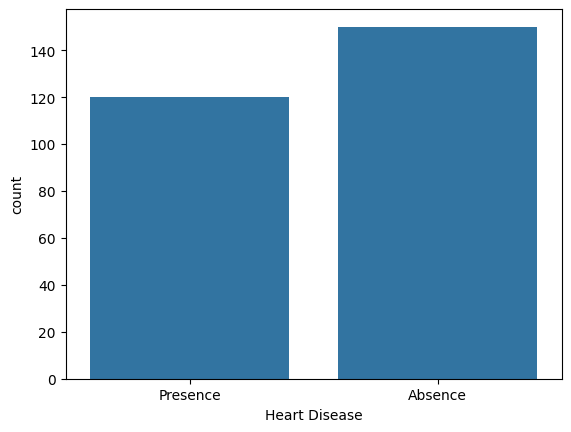

In [ ]:
sns.countplot(x='Heart Disease',data=df)

<Axes: >

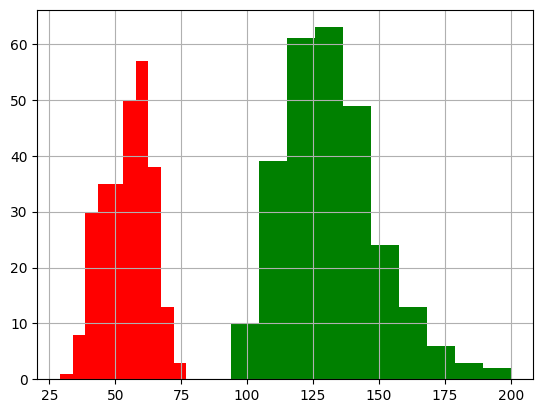

In [ ]:
df['Age'].hist(color='red')
df['BP'].hist(color='green')

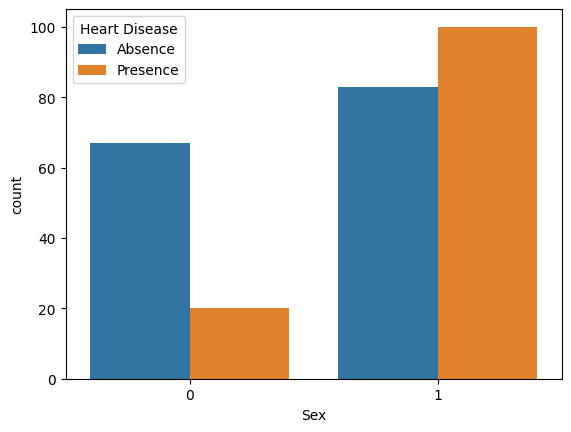

In [ ]:
sns.countplot(x="Sex", hue="Heart Disease", data=df)
plt.show()

<ipython-input-10-e7486308d882>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-10-e7486308d882>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<Axes: >

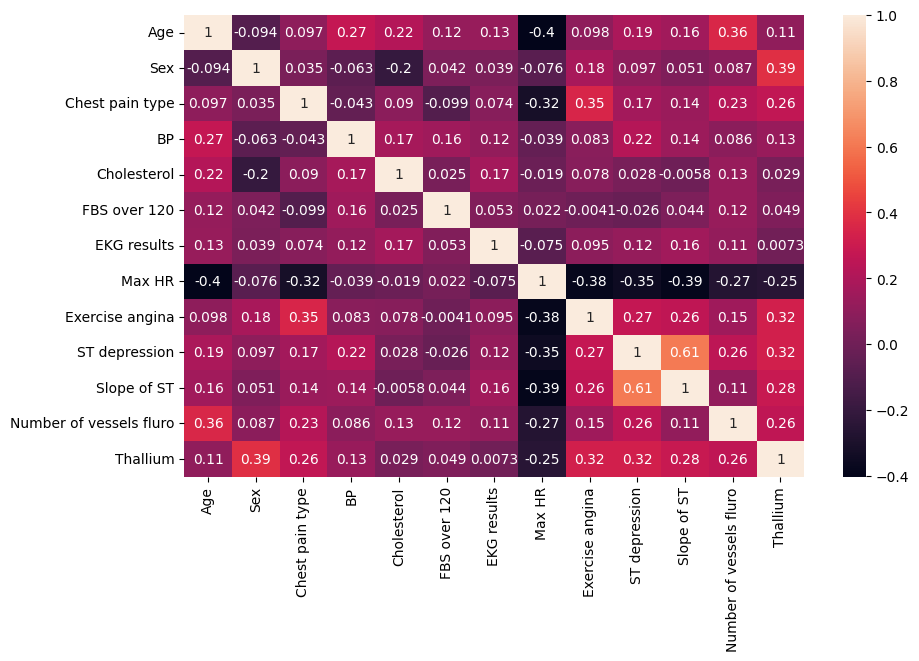

In [ ]:
df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot= True)

In [5]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
outcome_enc=lbl.fit_transform(df['Heart Disease'])
df['Heart Disease']=outcome_enc
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [6]:
print(df.corr()["Heart Disease"].abs().sort_values(ascending=False))

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Heart Disease, dtype: float64


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(df)

In [8]:
data_scaled= pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00,1.0
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00,0.0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00,1.0
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00,0.0
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00,0.0
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00,0.0
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00,0.0
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75,0.0


In [9]:
x = data_scaled.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75


In [10]:
y = data_scaled.iloc[:,-1].values
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred1= model1.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of KNN Algorithm:", acc1)

Accuracy of KNN Algorithm: 0.7941176470588235


In [14]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train,y_train)
y_pred2= model2.predict(x_test)
acc2 = accuracy_score(y_test,y_pred2)
print("Accuracy of Naive bayes Algorithm:", acc2)

Accuracy of Naive bayes Algorithm: 0.8676470588235294


In [15]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred3= model3.predict(x_test)
acc3 = accuracy_score(y_test,y_pred3)
print("Accuracy of SVM:", acc3)

Accuracy of SVM: 0.8088235294117647


In [16]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_pred4= model4.predict(x_test)
acc4 = accuracy_score(y_test,y_pred4)
print("Accuracy of decision Algorithm:", acc4)

Accuracy of decision Algorithm: 0.7058823529411765


In [18]:
from sklearn.ensemble import RandomForestClassifier
model5 =RandomForestClassifier()
model5.fit(x_train,y_train)
y_pred5= model5.predict(x_test)
acc5 = accuracy_score(y_test,y_pred5)
print("Accuracy of Random Forest Algorithm:", acc5)

Accuracy of Random Forest Algorithm: 0.8382352941176471


In [19]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression()
model6.fit(x_train,y_train)
y_pred6= model6.predict(x_test)
acc6 = accuracy_score(y_test,y_pred6)
print("Accuracy of Logistic regression Algorithm:", acc1)

Accuracy of Logistic regression Algorithm: 0.7941176470588235


In [20]:
accuracy_df=pd.DataFrame({'Accuracy':[acc1,acc2,acc3,acc4,acc5,acc6],'Algorithm':['KNN','Naive Bayes','SVM','Decision Tree','Random Forest','Logistic Regression']})
accuracy_df

,Accuracy,Algorithm
0,0.794118,KNN
1,0.867647,Naive Bayes
2,0.808824,SVM
3,0.705882,Decision Tree
4,0.838235,Random Forest
5,0.897059,Logistic Regression


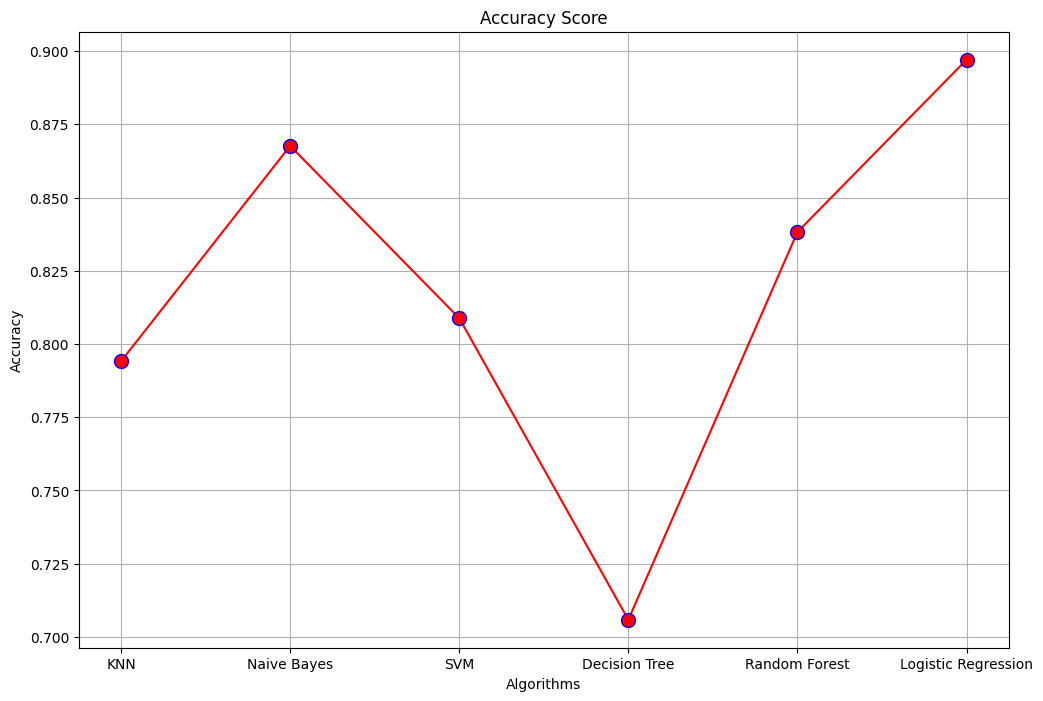

In [21]:
plt.figure(figsize=(12, 8))
plt.plot('Algorithm','Accuracy',data=accuracy_df,marker='o',color='red',ms = 10,mfc = 'r',mec = 'blue')
plt.title("Accuracy Score")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.plot()
plt.grid()